# FLIC Dataset

The [FLIC Dataset](https://bensapp.github.io/flic-dataset.html) is a pose detection dataset with images from moviess.

From the paper: 
* We collected a 5003 image dataset automatically from popular Hollywood movies. 
* The images were obtained by running a state-of-the-art person detector on every tenth frame of 30 movies.
* People detected with high confidence (roughly 20K candidates) were then sent to the crowdsourcing marketplace Amazon Mechanical Turk to obtain groundtruthlabeling. 
* Each image was annotated by five Turkers for $0.01 each to label 10 upperbody joints. The median-of-five labeling was taken in each image to be robust to outlier annotation. 
* Finally, images were rejected manually by us if the person was occluded or severely non-frontal. We set aside 20% (1016 images) of the data for testing. 

In [58]:
import collections
import os

basepath='/home/facundo/datasets/pose/flic'
metadata_filepath=os.path.join(basepath,'examples.mat')
fields= ['torsobox','moviename','filepath','imgdims','istrain','coords']
FLICImage= collections.namedtuple('FLICImage',fields)

import scipy.io
mat = scipy.io.loadmat(metadata_filepath)
metadata=mat['examples']
_,n=metadata['torsobox'].shape
print(metadata.dtype)
images=[]
for i in range(n):
    field_list=[metadata[field][0,j][0] for j,field in enumerate(fields)]
    image=FLICImage(*field_list)
    images.append(image)





[('poselet_hit_idx', 'O'), ('moviename', 'O'), ('coords', 'O'), ('filepath', 'O'), ('imgdims', 'O'), ('currframe', 'O'), ('torsobox', 'O'), ('istrain', 'O'), ('istest', 'O')]


[ 218.75410461  216.80335999  314.80557251  360.8805542 ]
12-oclock-high-special-edition
12-oclock-high-special-edition-00006381.jpg
[480 720   3]
[ 164.93876648  152.53060913  157.18367004  251.7959137   265.75509644
  285.91836548  174.24488831           nan           nan  233.18367004
           nan           nan  209.91836548  226.97958374           nan
           nan  223.87754822           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan]


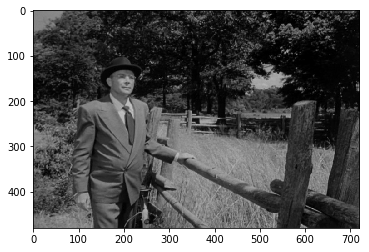

In [66]:

print(image.torsobox)
print(image.moviename)
print(image.filepath)
print(image.imgdims)
print(image.coords)

import matplotlib.pyplot as plt
import skimage.io
image_path=os.path.join(basepath,'images',image.filepath)
im=skimage.io.imread(image_path)
plt.imshow(im)
plt.show()





In [63]:
def get_key():
    key={}
    #label to index
    key["lsho"] = 1
    key["lelb"] = 2
    key["lwri"] = 3
    key["rsho"] = 4
    key["relb"] = 5
    key["rwri"] = 6
    key["lhip"] = 7
    key["lkne"] = 8
    key["lank"] = 9
    key["rhip"] = 10
    key["rkne"] = 11
    key["rank"] = 12
    key["leye"] = 13
    key["reye"] = 14
    key["lear"] = 15
    key["rear"] = 16
    key["nose"] = 17
    key["msho"] = 18
    key["mhip"] = 19
    key["mear"] = 20
    key["mtorso"] = 21
    key["mluarm"] = 22
    key["mruarm"] = 23
    key["mllarm"] = 24
    key["mrlarm"] = 25
    key["mluleg"] = 26
    key["mruleg"] = 27
    key["mllleg"] = 28
    key["mrlleg"] = 29

    #support for alternate, original labels
    key["L_Shoulder"] = 1
    key["L_Elbow"] = 2
    key["L_Wrist"] = 3
    key["R_Shoulder"] = 4
    key["R_Elbow"] = 5
    key["R_Wrist"] = 6
    key["L_Hip"] = 7
    key["L_Knee"] = 8
    key["L_Ankle"] = 9
    key["R_Hip"] = 10
    key["R_Knee"] = 11
    key["R_Ankle"] = 12

    key["L_Eye"] = 13
    key["R_Eye"] = 14
    key["L_Ear"] = 15
    key["R_Ear"] = 16
    key["Nose"] = 17

    key["M_Shoulder"] = 18
    key["M_Hip"] = 19
    key["M_Ear"] = 20
    key["M_Torso"] = 21
    key["M_LUpperArm"] = 22
    key["M_RUpperArm"] = 23
    key["M_LLowerArm"] = 24
    key["M_RLowerArm"] = 25
    key["M_LUpperLeg"] = 26
    key["M_RUpperLeg"] = 27
    key["M_LLowerLeg"] = 28
    key["M_RLowerLeg"] = 29
    return key



# key.KEYPOINT_FLIPMAP = [
#     key.L_Shoulder key.R_Shoulder
#     key.L_Elbow    key.R_Elbow
#     key.L_Wrist    key.R_Wrist
#     key.R_Shoulder key.L_Shoulder
#     key.R_Elbow    key.L_Elbow
#     key.R_Wrist    key.L_Wrist
#     key.L_Hip      key.R_Hip
#     key.L_Knee     key.R_Knee
#     key.L_Ankle    key.R_Ankle
#     key.R_Hip      key.L_Hip
#     key.R_Knee     key.L_Knee
#     key.R_Ankle    key.L_Ankle
#     key.L_Eye      key.R_Eye
#     key.R_Eye      key.L_Eye
#     key.L_Ear      key.R_Ear
#     key.R_Ear      key.L_Ear
#     key.M_LUpperArm key.M_RUpperArm
#     key.M_RUpperArm key.M_LUpperArm
#     key.M_LLowerArm key.M_RLowerArm
#     key.M_RLowerArm key.M_LLowerArm
#     key.M_LUpperLeg key.M_RUpperLeg
#     key.M_RUpperLeg key.M_LUpperLeg
#     key.M_LLowerLeg key.M_RLowerLeg
#     key.M_RLowerLeg key.M_LLowerLeg
#     key.Nose key.Nose
#     ]